# zfitter
zfit wrapper for lazy analysits [GitHub](https://github.com/mzks/zfitter)

Author: Keita Mizukoshi (Kobe Univ. mzks@stu.kobe-u.ac.jp, @mzks)

## Concept
[`zfit`](https://github.com/zfit/zfit) is a nice fitting tools on python, built on object-oriented interface.
However, I would sometime like to fit easily. I do *not always* want to care minimizers and cost function.
I usually take an approach for good fitting, try-error-retry with visual environment.
For that purpose, raw `zfit` is slightly much.
To prevent tenosynovitis of lazy analysts, I made a wrapper of `zfit`, `zfitter`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# generate sample data
data = np.random.normal(11, 4, 10000)

### Make 1-d histogram of data

In [13]:
from zfitter import zfitter
zf = zfitter(data)

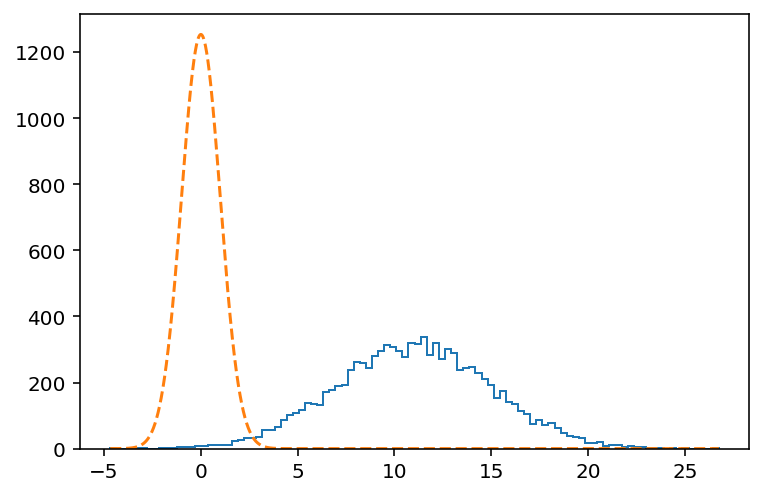

In [17]:
# If you want, number of bins and ranges can be set.
#zf.set_bins(200) # Number of bins
#zf.set_data_range(0, 25) # Range for data
#zf.set_range(5, 15) # Range for fitting

# Let's visualize! zfitter always provides `draw()` to visualize even before definition of model.
zf.draw()

### Model

In [20]:
zf.set_model('gauss') # I would like to use gaussian. But,... which parameters can be used? This method prints parameter list.

Parameters
mu : 0.0
sigma : 1.0


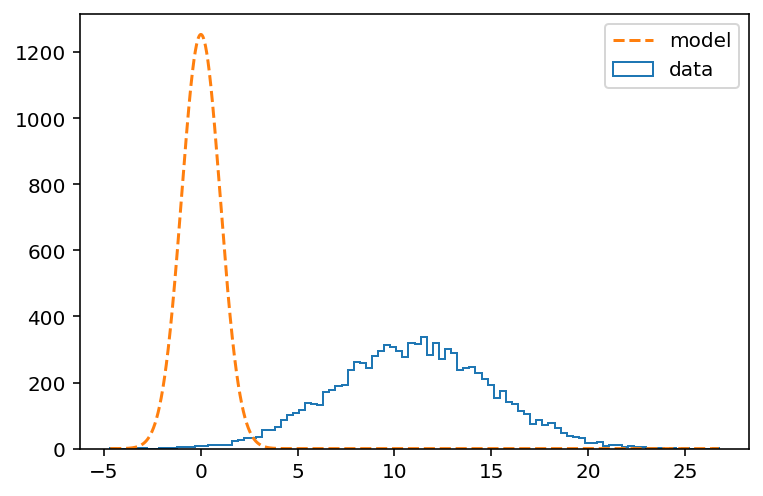

In [21]:
# Before fitting
zf.draw(); # Always can be used!
plt.legend()

The initial valeues of the model is not good.
Set better values manually and re-draw.

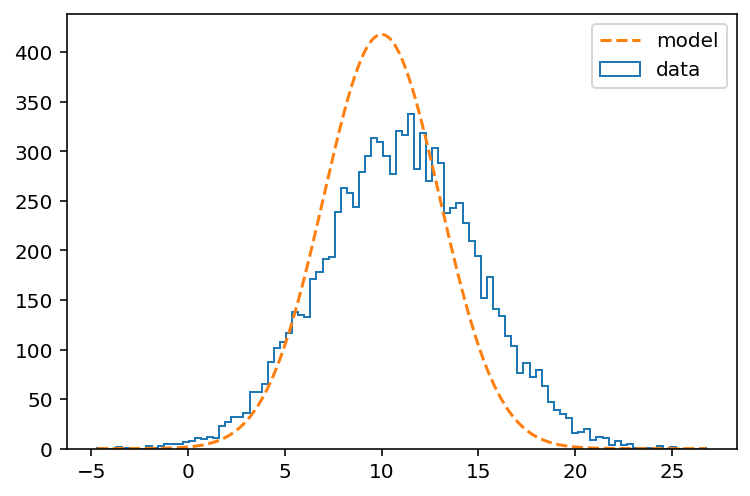

In [22]:
zf.set_parameter('mu', 10)
zf.set_parameter('sigma', 3)
zf.draw()
plt.legend()

This is not perfect, but it is enough to fit. The rest work is fitter's one.
If you don't like the initial values, you can go back and re-set parameters.

In [23]:
zf.fit()

/Users/mzks/zfit_test/zfit/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[mu, sigma] dtype=float64>0] data=[<zfit.core.data.Data object at 0x14f4ecad0>] constraints=[]> 
with
<Adam strategy=PushbackStrategy tolerance=1e-05>

╒═════════╤═════════════╤══════════════════╤═══════╤════════════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value          │
╞═════════╪═════════════╪══════════════════╪═══════╪════════════════════╡
│ True    │ True        │ False            │ -999  │ 28004.791449083263 │
╘═════════╧═════════════╧══════════════════╧═══════╧════════════════════╛

Parameters
name      value    at limit
------  -------  ----------
mu        10.95       False
sigma     3.984       False

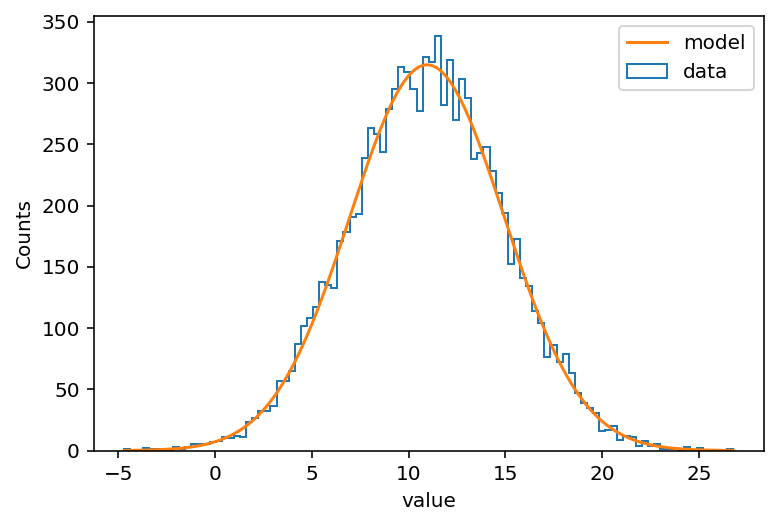

In [24]:
zf.draw();
plt.xlabel('value')
plt.ylabel('Counts')
plt.legend()